In [890]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [1057]:
#read file
df = pd.read_csv('indiadata.csv')

In [1058]:
df.head(5)

,Year,City,Country,latitude,longitude,attack type,Target Type,Target Sub Type,Target,Weapon Type,Weapon sub type,Terrorist Organization,motive,summary
0,1975,Samastipur,India,25.863042,85.781004,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Lalit Narayan Mishra and a legislator,Explosives/Bombs/Dynamite,Unknown Explosive Type,Ananda Marga,Unknown,"1/2/1975: The Indian Railway Minister, Lalit N..."
1,1997,Unknown,India,33.778175,76.576171,Bombing/Explosion,Transportation,Bus Station/Stop,A bus station in Kashmir,Explosives/Bombs/Dynamite,Vehicle,Muslim Rebels,"Specific motive is unknown; however, the blast...",3/29/1997: Two explosions occurred at a bus st...
2,1997,Dhalai district,India,23.846698,91.909924,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Border Patrol Guards,Explosives/Bombs/Dynamite,Land Mine,National Liberation Front of Tripura (NLFT),"While the motive for this attack is unknown, t...",11/7/1997: A suspected anti-tank land mine exp...
3,1997,Hyderabad,India,17.376812,78.487812,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",People leaving a party. Wounded included Moha...,Explosives/Bombs/Dynamite,Vehicle,Unknown,"While the motive for this attack is unknown, i...",11/19/1997: A car bomb exploded in Hyderabad i...
4,1998,New Delhi,India,28.632381,77.220004,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians in New Delhi,Explosives/Bombs/Dynamite,Time Fuse,Unknown,Unknown,"01/09/1998: At least 44 people were injured, t..."


The following datasets consists of infomation of all the terrorist related attacks that have taken place in India from 1975.

In [1059]:
#looking at general data info
df = df.replace('Unknown', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 14 columns):
Year                      4972 non-null int64
City                      4835 non-null object
Country                   4972 non-null object
latitude                  4972 non-null float64
longitude                 4972 non-null float64
attack type               4845 non-null object
Target Type               4889 non-null object
Target Sub Type           4972 non-null object
Target                    4869 non-null object
Weapon Type               4598 non-null object
Weapon sub type           4972 non-null object
Terrorist Organization    3557 non-null object
motive                    3746 non-null object
summary                   4972 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 543.9+ KB


In [1060]:
df.describe()

,Year,latitude,longitude
count,4972.000000,4972.000000,4972.000000
mean,2008.215607,25.197249,84.078899
std,4.349748,5.372288,6.761981
min,1975.000000,8.180270,69.612516
25%,2006.000000,22.282182,77.267544
50%,2009.000000,24.789854,84.476326
75%,2011.000000,26.746018,90.443986
max,2015.000000,34.606944,95.900036


There are only 3 columns with numberical data, therefore most of this analysis will be based on the number of datapoints related to different categories. 

Let us begin by looking at the general distribution of attacks throughout the years.

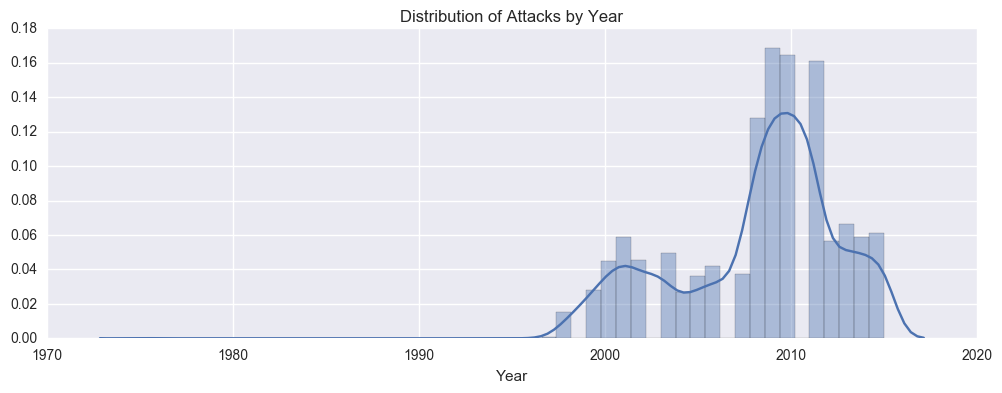

In [1061]:
#plotting distributions
plt.figure(figsize = (12, 4))
sns.distplot(df['Year'])
plt.xlabel('Year')
plt.title('Distribution of Attacks by Year')

The distribution seems bimodal in nature with one peak at around 2001 and another peak around 2009. There is also a large negative skew in the data due to presence of one outlier year in 1975. Let's remove that to get a better picture.

In [1062]:
#removing the first value to get a better distribution
df = df.iloc[1:]

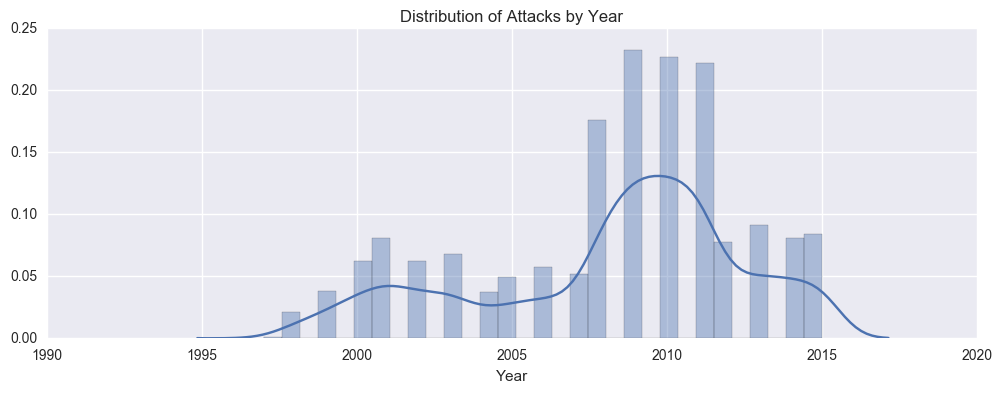

In [53]:
plt.figure(figsize = (12, 4))
sns.distplot(df['Year'])
plt.xlabel('Year')
plt.title('Distribution of Attacks by Year')

In [1063]:
#replacing some really long names with shorter ones so as to fit on graphs properly
df['attack type'] = df['attack type'].replace('Hostage Taking (Kidnapping)', 'Hostage')
df['attack type'] = df['attack type'].replace('Facility/Infrastructure Attack', 'Facility Attack')
df['attack type'] = df['attack type'].replace('Hostage Taking (Barricade Incident)', 'Barricade Hostage')

Lets look at the different types of attacks that have taken place.

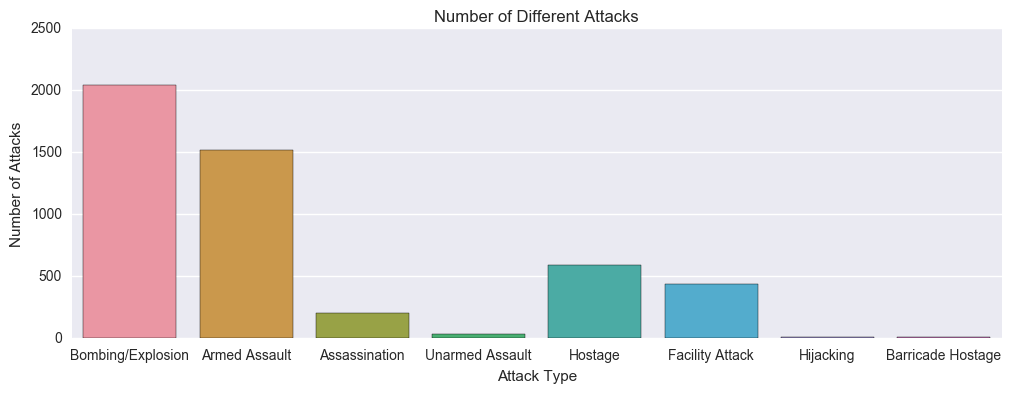

In [35]:
#plotting different types of attacks
plt.figure(figsize = (12,4))
sns.countplot(df['attack type'])
plt.title('Number of Different Attacks')
plt.ylabel('Number of Attacks')
plt.xlabel('Attack Type')

Lets look at the attacks based on latitudes and longitudes.

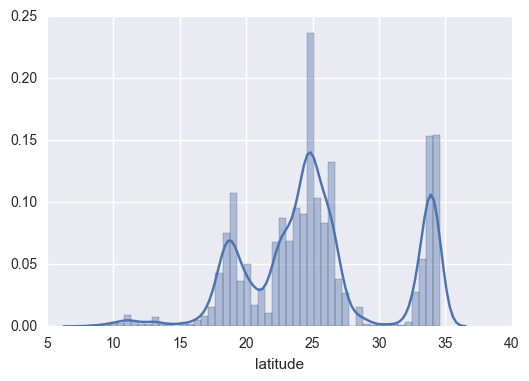

In [1064]:
sns.distplot(df['latitude'])

What's interesting to see here is that the as we move towards higher latitudes(from south to north), the number of attacks increase. It seems to show that the southern part of india seems to be relatively safer from these attacks than the north.

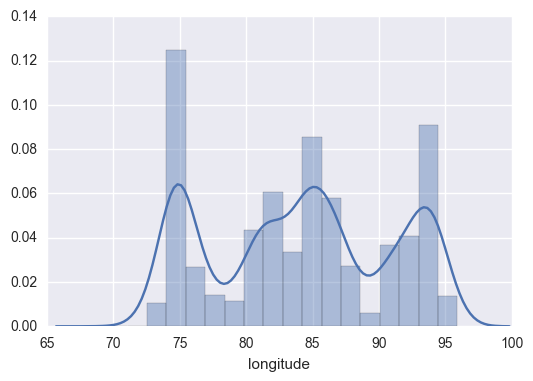

In [1065]:
sns.distplot(df['longitude'])

There doesn't seem to be a clear representation of the attacks vary from west to east. It seems to have its ups and downs.

Lets look at the cities where the attacks took place in.

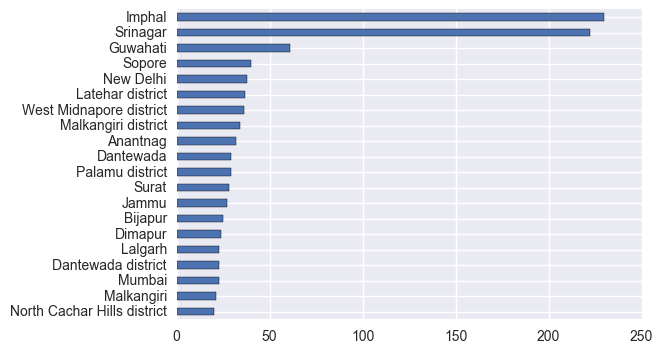

In [1083]:
## cities with most attacks
most_cities = df['City'].value_counts()[:20]
most_cities.plot(kind = 'barh').invert_yaxis()

What we can see here is that, most of the attacks aren't in the big cities(just 2 of them in Mumbai and New Delhi). I wasn't surprised to see places like Srinagar and Jammu in the list as they are located near our border with Pakistan, with whom we don't share good relations with.

However, I was surprised to see places like Guwahati and Imphal at the top of the list.

Lets have a look at the different attacks on a map.

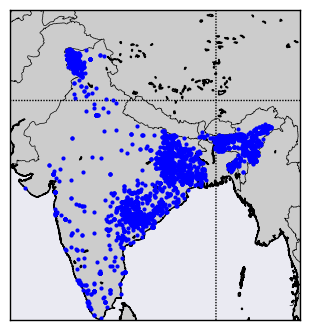

In [244]:
map = Basemap(projection='merc', lat_0=23, lon_0= 84,
    resolution = 'h', area_thresh = 100.0,
    llcrnrlon=68, llcrnrlat= 8,
    urcrnrlon= 99, urcrnrlat= 38)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents()
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

longitudes = df['longitude'].values
latitudes = df['latitude'].values


x,y = map(longitudes, latitudes)
map.plot(x, y, 'bo', markersize=3)

plt.show()

I was surprised to see most attacks come from the east and not from the north considering India's biggest enemy in Pakistan is in the north. I decided to split the maps into the 90's, 2000s and 2010s to see the pattern of attacks through the decades.

In [250]:
decade_bins = [1990, 2000, 2010, 2020]
df['decade'] = pd.cut(df['Year'], decade_bins)

In [257]:
decade_1 = df[(df['Year'] >= 1990) & (df['Year'] < 2000)]
decade_2 = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]
decade_3 = df[df['Year'] >= 2010]

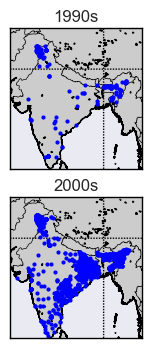

In [1084]:
fig = plt.figure()

##1990s
ax = fig.add_subplot(211)
ax.set_title("1990s")
map = Basemap(projection='merc', lat_0=23, lon_0= 84,
    resolution = 'h', area_thresh = 100.0,
    llcrnrlon=68, llcrnrlat= 8,
    urcrnrlon= 99, urcrnrlat= 38)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents()
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

longitudes = decade_1['longitude'].values
latitudes = decade_1['latitude'].values


x,y = map(longitudes, latitudes)
map.plot(x, y, 'bo', markersize=3)


##2000s
ax = fig.add_subplot(212)
ax.set_title("2000s")
map = Basemap(projection='merc', lat_0=23, lon_0= 84,
    resolution = 'h', area_thresh = 100.0,
    llcrnrlon=68, llcrnrlat= 8,
    urcrnrlon= 99, urcrnrlat= 38)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents()
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

longitudes = decade_2['longitude'].values
latitudes = decade_2['latitude'].values

x,y = map(longitudes, latitudes)
map.plot(x, y, 'bo', markersize=3)

plt.show()

We can see from the above maps that attacks greatly increased from the 90s to the 2000s. A substantial increase can be seen in the Eastern parts of India as well as to the South East. Now let's see how this compares to the 2010s.

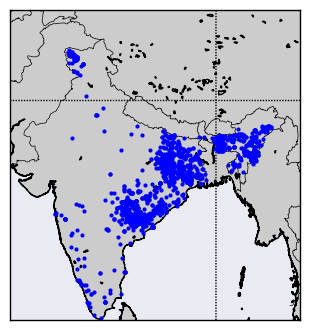

In [260]:
map = Basemap(projection='merc', lat_0=23, lon_0= 84,
    resolution = 'h', area_thresh = 100.0,
    llcrnrlon=68, llcrnrlat= 8,
    urcrnrlon= 99, urcrnrlat= 38)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents()
map.drawmapboundary()
 
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

longitudes = decade_3['longitude'].values
latitudes = decade_3['latitude'].values


x,y = map(longitudes, latitudes)
map.plot(x, y, 'bo', markersize=3)

There isnt much change when it comes to the Eastern parts of the country, but there seems to be a significant decrease in attacks at our northen border.

Now let's look at the number of attacks over the years

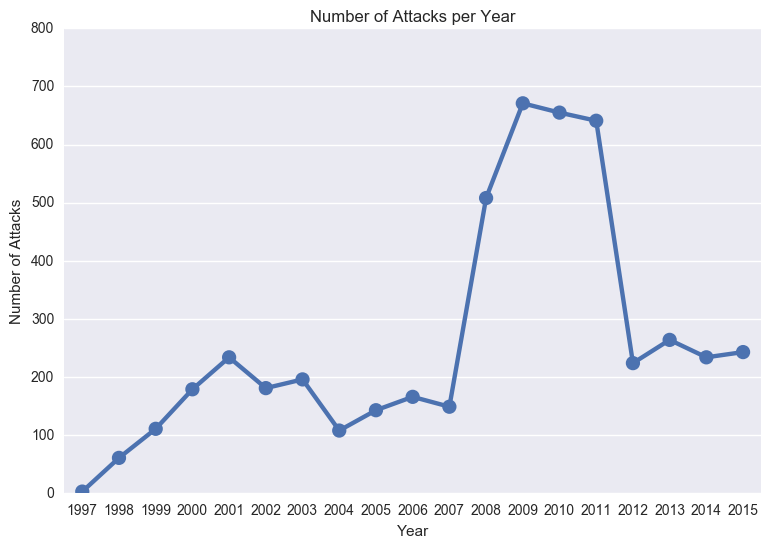

In [577]:
df['Year'].value_counts()
plt.figure(figsize = (9, 6))
sns.pointplot(x = df['Year'].value_counts().index, y = df['Year'].value_counts().values)
plt.ylim(0)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')

I wanted to investigate the major spike from 2007. So I decided to check which part of India it was coming from. So I divided Indian Regions based on the centre coordinates of India, to see which part of India the attacks have increased in over the years.

In [295]:
##centre coordinates of India
centre_lat = 22
centre_long = 78

In [293]:
# creating new column 'location' to see if it was NW, NE, SW or SE based on the centre coordinates
df['location'] = np.where(((df['latitude'] > centre_lat) & (df['longitude'] > centre_long)), 'NE', df['location'])
df['location'] = np.where(((df['latitude'] < centre_lat) & (df['longitude'] > centre_long)), 'SE', df['location'])
df['location'] = np.where(((df['latitude'] < centre_lat) & (df['longitude'] < centre_long)), 'SW', df['location'])
df['location'] = np.where(((df['latitude'] > centre_lat) & (df['longitude'] < centre_long)), 'NW', df['location'])

Now let us plot the attacks throughout the years and separate them based on location.

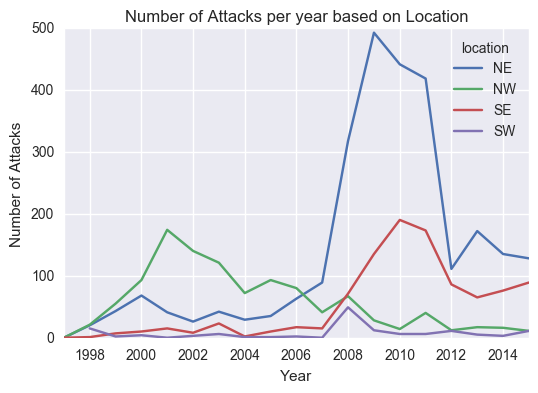

In [478]:
#grouping the data by year and location
by_location = pd.DataFrame(df.groupby(['Year','location'])['location'].count())
plot_df = by_location.unstack('location').loc[:, 'location']
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq= 'B')
plot_df.plot()
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.title('Number of Attacks per year based on Location')

As we can see, most of the increase in attacks from 2007 onwards have come from the Eastern Parts (North-East in particular) of India. I decided to have a look at which organization was mostly responsible for this.

In [1088]:
## looking at all incident counts by each organization
terrorists = pd.DataFrame(df['Terrorist Organization'].value_counts())
terrorists.head(10)

,Terrorist Organization
Communist Party of India - Maoist (CPI-Maoist),1547
Maoists,385
United Liberation Front of Assam (ULFA),238
National Democratic Front of Bodoland (NDFB),106
Lashkar-e-Taiba (LeT),100
Other,92
Hizbul Mujahideen (HM),88
Garo National Liberation Army,82
People's War Group (PWG),62
National Liberation Front of Tripura (NLFT),62


The top 3 perpetrators of attacks were mainly organizations located in the east. A closer look at the CPI(Maosts) online showed me that this was an organization bent on overthrowing the Indian government. What was shocking to me was that, they were only formed in 2004 and have contributed 4X the attacks than anyone else.

According to a CPI spokesman, "The immediate aim of the party is to accomplish the New Democratic Revolution in India by overthrowing imperialism, feudalism and comprador bureaucratic capitalism only through the Protracted People’s War ... The ultimate aim of the party is to bring about communism". (http://www.aljazeera.com/indepth/features/2017/04/india-maoist-rebels-explainer-170426132812114.html).

I decided to look at the organizations that had carried out at least 50 attacks.

In [1089]:
## taking organizations with more than 50 attacks
terrorists.reset_index(level=0, inplace=True)
terrorists.rename(columns={'index': 'Organization', 'Terrorist Organization': 'Num attacks'}, inplace=True)
terrorists = terrorists[terrorists['Num attacks'] >= 50]

In [1090]:
#getting the list of the terrorists

list_terrorists = list(terrorists['Organization'].values)
list_terrorists

['Communist Party of India - Maoist (CPI-Maoist)',
 'Maoists',
 'United Liberation Front of Assam (ULFA)',
 'National Democratic Front of Bodoland (NDFB)',
 'Lashkar-e-Taiba (LeT)',
 'Other',
 'Hizbul Mujahideen (HM)',
 'Garo National Liberation Army',
 "People's War Group (PWG)",
 'National Liberation Front of Tripura (NLFT)',
 'National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)']

In [1091]:
#extracting a section of the original dataframe that consists only the above terrorists

main_terrorists = df[df['Terrorist Organization'].isin(list_terrorists)].reset_index().drop('index', axis = 1)

I will be repeating similar code to group various aspects of the dataframe. So i decided to write a function that would do it with one function.

In [990]:
def grouped(dframe, column, title):
    new_df = pd.DataFrame(dframe.groupby(['Year', column])[column].size()).rename(columns = {0: title})
    new_df.reset_index(level = [0,1], inplace = True)
    return new_df

In [994]:
#getting the different attacks by each terrorist organization and plotting them
group_terrorist = grouped(main_terrorists, 'Terrorist Organization', 'Number of Attacks')

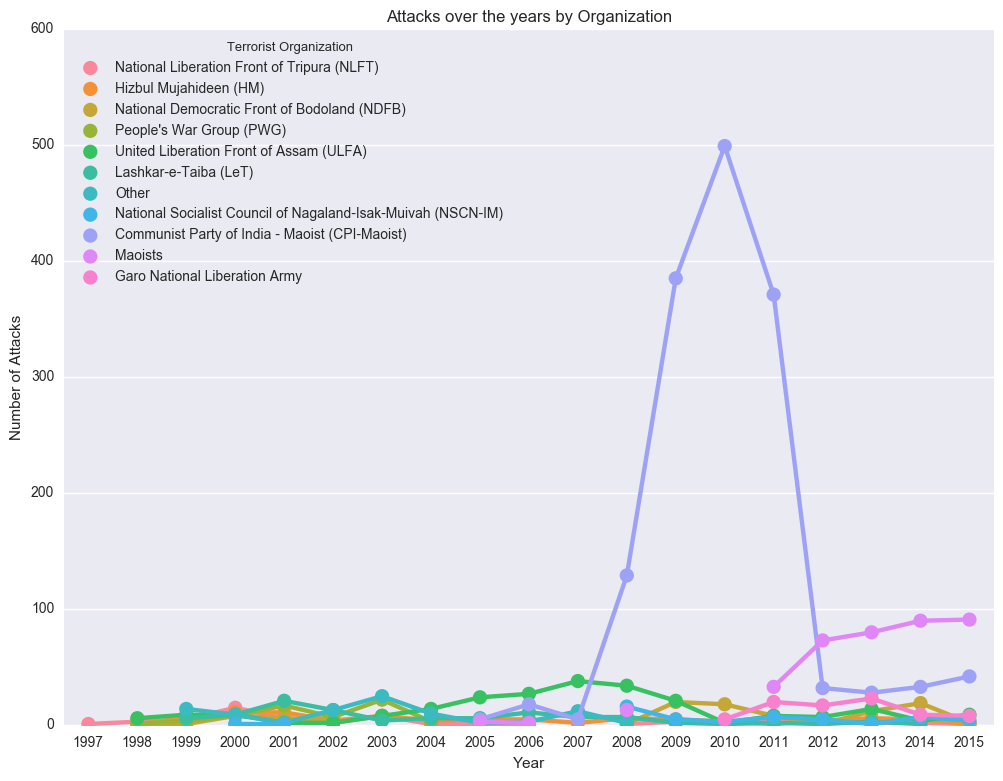

In [995]:
plt.figure(figsize= (12, 9))
sns.pointplot(data = group_terrorist, x = 'Year', y = 'Number of Attacks', hue = 'Terrorist Organization')
plt.ylim(-1)
plt.ylabel('Number of Attacks')
plt.title('Attacks over the years by Organization')

Again, to reiterate an earlier point, most of the activity is coming from the parties pushing a Maoist agenda. Looking closely at the CPI, it looks like they started their extreme behaviour during 2008. What's interesting to see is that from 2010 onwards, their activity has greatly reduced. Reading online, I realized that in 2009, then Prime Minister Dr. Manmohan Singh had deployed the army to areas that were greatly affected by this organization. The attacks seemed to have escalated at first but has greatly reduced since then.

I then decided to look at who these terrorists tended to target the most.

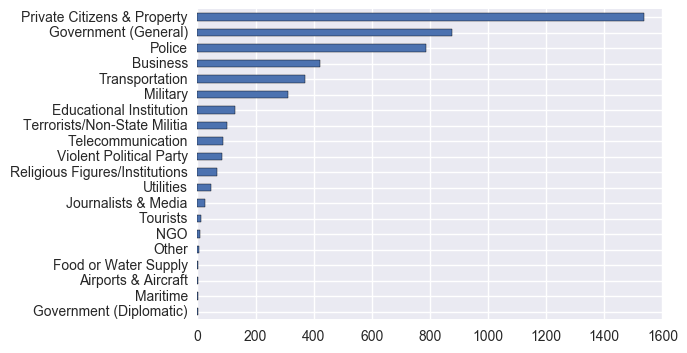

In [758]:
#bar graph to see the targets
df['Target Type'].value_counts(ascending = True).plot(kind = 'barh')

Its clear to see that most of the victims were private citizens, the government and the police. I wanted to see if that was a trend among most of the terrorist organizations, so I took the ones that committed the 6 most attacks and the common target types.

In [1139]:
#creating a list of target types most affected, a list of terrorists with most attacks and creating a subset of the dataframe
victims = ['Private Citizens & Property', 'Government (General)', 'Police',
       'Business', u'Transportation', 'Military', 'Religious Figures/Institutions']
terrorist_list = df['Terrorist Organization'].value_counts()[:6].index
data_subset = df[(df['Terrorist Organization'].isin(terrorist_list)) & (df['Target Type'].isin(victims))]

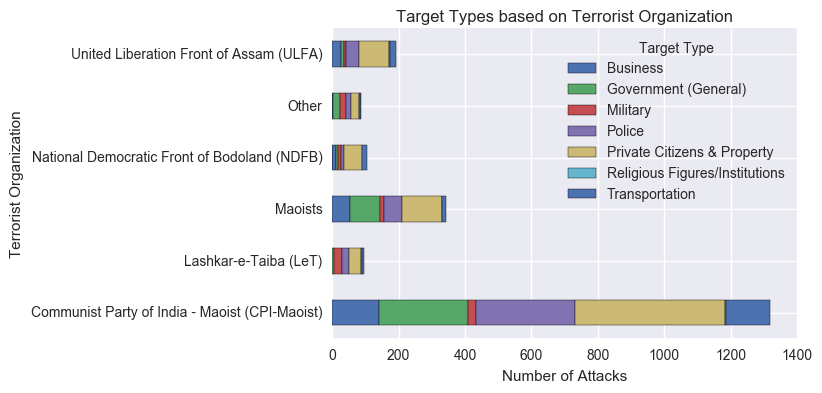

In [1141]:
##grouping by terrorist and target and getting the count to plot
subset_plot = data_subset.groupby(['Terrorist Organization', 
                                   'Target Type'])['Terrorist Organization'].count().unstack('Target Type').fillna(0)
plt.figure(figsize= (12, 10))
subset_plot.plot(kind = 'barh', stacked = True)
plt.title('Target Types based on Terrorist Organization')
plt.xlabel('Number of Attacks')

Even if you look at the organizations individually, most of them tended to attack private citizens and the government more than anybody else. Attacking private citizens has never made logical sense to me in terms of organizations achieving their goals, but it may be because they are probably the easiest targets.

Lets see how theses targets have varied over the years.

In [671]:
#creating a subset of the 7 most attacked targets
major_targets = df['Target Type'].value_counts().index[:7]
target_df = df[df['Target Type'].isin(major_targets)].reset_index().drop('index', axis = 1)

In [1000]:
#grouping the targets by year and getting the count values
by_year_target = grouped(target_df, 'Target Type', 'Number of Attacks')

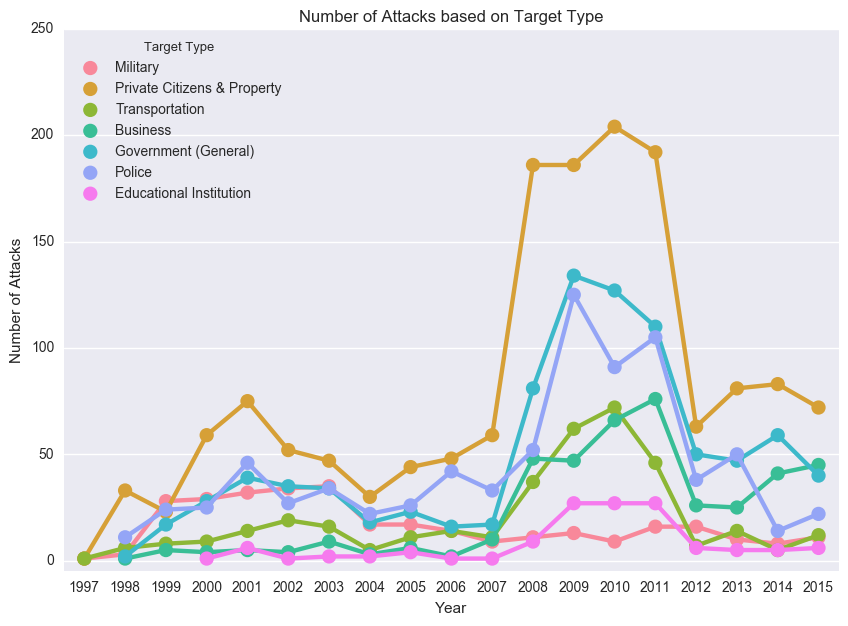

In [1001]:
#plotting the above df
plt.figure(figsize= (10, 7))
sns.pointplot(data = by_year_target, x = 'Year', y = 'Number of Attacks', hue = 'Target Type')
plt.ylabel('Number of Attacks')
plt.ylim(-5)
plt.title('Number of Attacks based on Target Type')

Whats interesting to note here is that in terms of private citizens, the government, and the police, the graphs seems to have a very similar shape owing to the maoist activity mentioned earlier. Its quite clear to see that terrorists have been targeting civilians the most since the beginning, except in 1999, where there more attacks on the military owing to the Kargil war that broke out with Pakistan.

Lets look at the different types of attacks carried out.

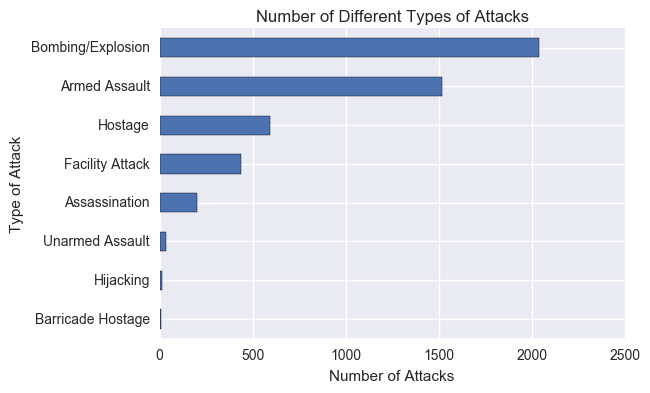

In [1142]:
#looking at the types of attacks
df['attack type'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Number of Different Types of Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Type of Attack')

Bombing and using assault weapons were the most common types of attacks which isnt surprising. Let's see if that changed over the years.

In [1143]:
#grouping the attack types by year
attack_type = grouped(df, 'attack type', 'Number of Attacks')

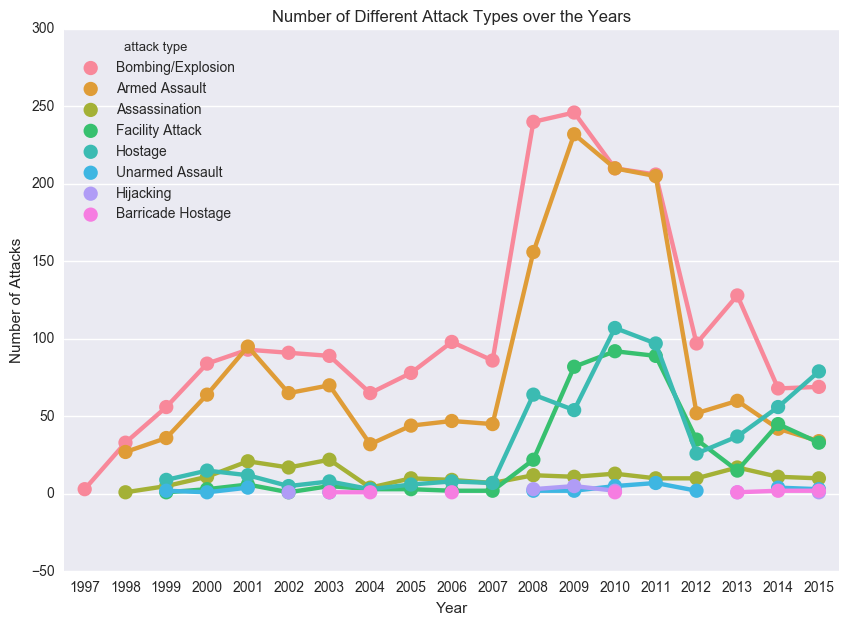

In [1145]:
plt.figure(figsize= (10, 7))
sns.pointplot(data = attack_type, x = 'Year', y = 'Number of Attacks', hue = 'attack type')
plt.title('Number of Different Attack Types over the Years')
plt.ylabel('Number of Attacks')

For the most part, bombs and assault weapons have been used by terrorists to attack, but they have gone down significantly in the last 5 years. Interestingly enough, hostage situations and kidnappings have increased quite a bit in that time. I will be looking at a few of these categories more deeply.

First, lets have a look at bombings.

In [723]:
#subset of data frame consisting only of bombings
bombings = df[df['attack type'] == 'Bombing/Explosion']

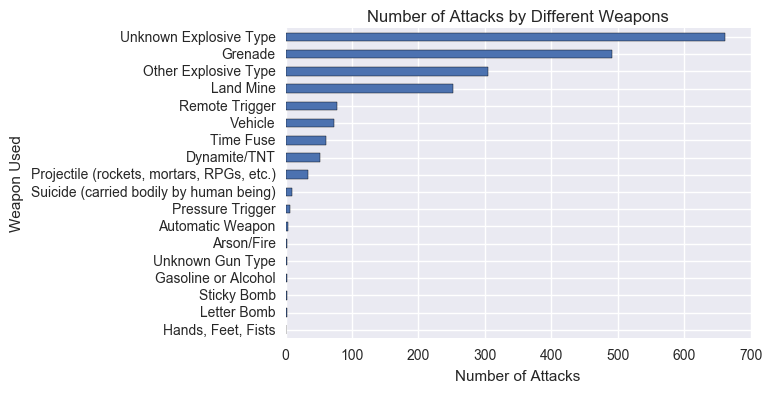

In [1147]:
# to see what they used to bomb and plot the different types

bombings['Weapon sub type'].value_counts(ascending = True).plot(kind= 'barh')
plt.title('Number of Attacks by Different Weapons')
plt.ylabel('Weapon Used')
plt.xlabel('Number of Attacks')

From the graph above, it seems as though it is very difficult to understand what types of explosive devices were used by the terrorists. This may be due to the fact that there isn't just one way to build a bomb and that a lot of bombs could actually be home-made.

Let's move on to hostage situations.

In [1006]:
#data frame of only hostage situations
hostage = df[df['attack type'] == 'Hostage']

(-5, 70.0)

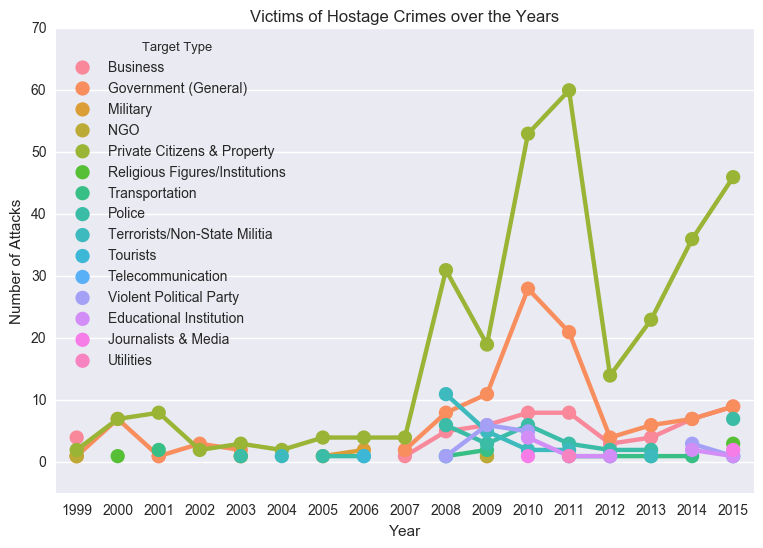

In [1150]:
##finding the major victims of hostage situations
hostage_target = grouped(hostage, 'Target Type', 'Number of Incidents')
plt.figure(figsize= (9, 6))
sns.pointplot(data = hostage_target, x = 'Year', y = 'Number of Incidents', hue = 'Target Type')
plt.title('Victims of Hostage Crimes over the Years')
plt.ylabel('Number of Attacks')
plt.ylim(-5)

It looks like private citizens and government officials were most of the victims here too. The police were the third highest victims in overall crimes, but when it comes to hostages, they are quite low in number, which makes logical sense.

Lets see who were the highest perpetrators of hostage crimes.

In [1009]:
##to find out which organizations perpetrated the most hostage situations
hostage_org = grouped(hostage, 'Terrorist Organization', 'Number of Incidents')

In [1151]:
#getting the organizations with the 10 highest hostage situations
max_hostage = list(hostage_org.groupby('Terrorist Organization')['Number of Incidents'].sum()
                   .sort_values(ascending = False).index[:10])

In [1011]:
#acquiring the data frame with only the hostages acquired above
hostage_df = hostage_org[hostage_org['Terrorist Organization'].isin(max_hostage)]

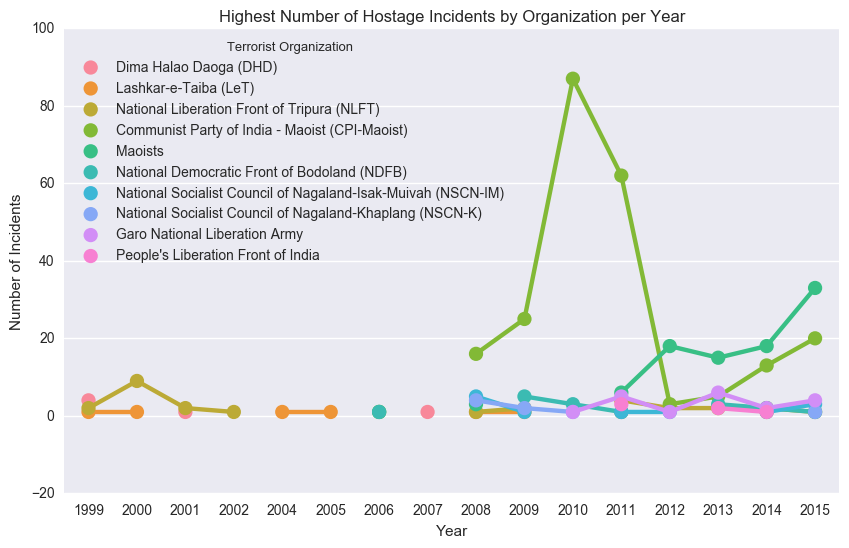

In [1013]:
#plotting the above data frame
plt.figure(figsize= (10, 6))
sns.pointplot(data = hostage_df, x = 'Year', y = 'Number of Incidents', hue = 'Terrorist Organization')
plt.title('Highest Number of Hostage Incidents by Organization per Year')
plt.ylabel('Number of Incidents')

In this situation as well, it seems the Maoist parties are high up on the list.

Let's move on to assassinations. What I noticed while going through the data was that, in terms of assassination attemps, the summary explicitly states whether the target was killed or not. But the issue was that it was written in different tenses. (eg. kill, killed)

So I decided to go through each summary of assassination attempts, go through each word, stem it to its root form and look at only the unique words to avoid repetition. If 'kill' was located in the summary, a '1' would be input into a new column names 'success'. If 'kill' wasn't located, a '0' would be input into the success column.

In [939]:
## creating new column 'success' whose values depend on 'summary' (1 if the target was killed, 0 if the target survived)
stemmer = SnowballStemmer('english')
assassination = df[df['attack type'] == 'Assassination']
for x, y in assassination.iterrows():
    word_list = []
    for words in y['summary'].split():
        words = unicode(words, errors='replace')
        word_list.append(stemmer.stem(words))
    if 'kill' in set(word_list):
        assassination.loc[x, 'success'] = 1
    else:
        assassination.loc[x, 'success'] = 0    

In [942]:
#Aggregating assassinations by year to get the total and averages per year
assassination_by_year = assassination.groupby('Year').agg({'success': {'Total': 'count',
                                                                       'Successful': 'sum', 'Average': 'mean'}})

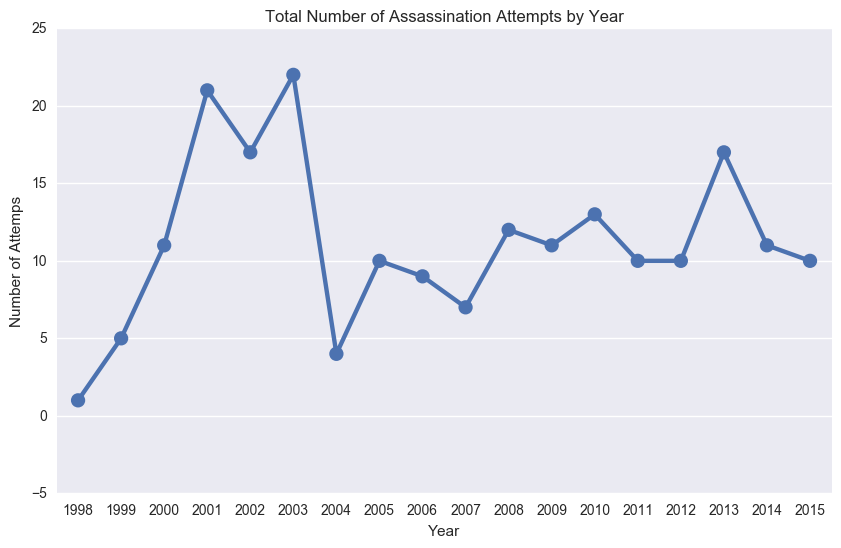

In [961]:
##plotting assassination attempts per year
plt.figure(figsize= (10, 6))
sns.pointplot(x = assassination_by_year.index, y = assassination_by_year.success.Total)
plt.title('Total Number of Assassination Attempts by Year')
plt.ylabel('Number of Attemps')

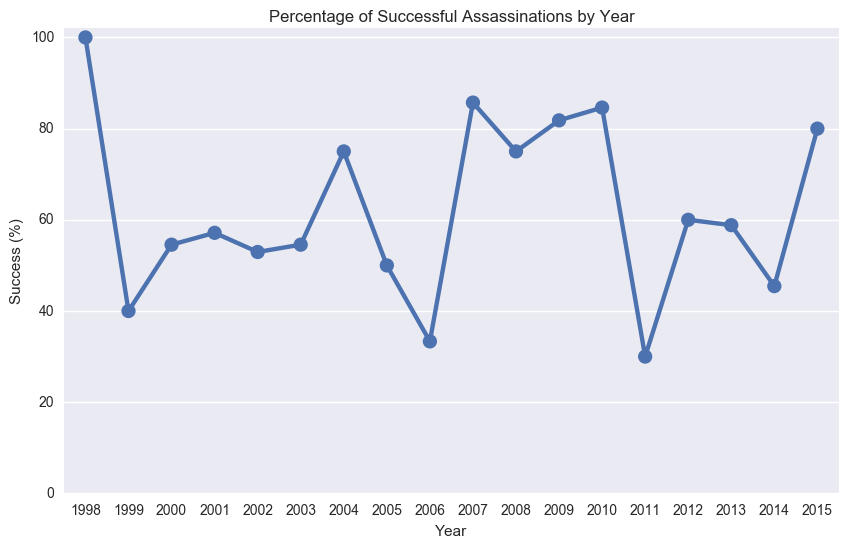

In [966]:
##plotting assassination success per year
plt.figure(figsize= (10, 6))
sns.pointplot(x = assassination_by_year.index, y = assassination_by_year.success.Average*100 )
plt.title('Percentage of Successful Assassinations by Year')
plt.ylim(0, 102)
plt.ylabel('Success (%)')

Next, I decided to look at which organizations among the most attacks were the most successful in carrying out assassinations.

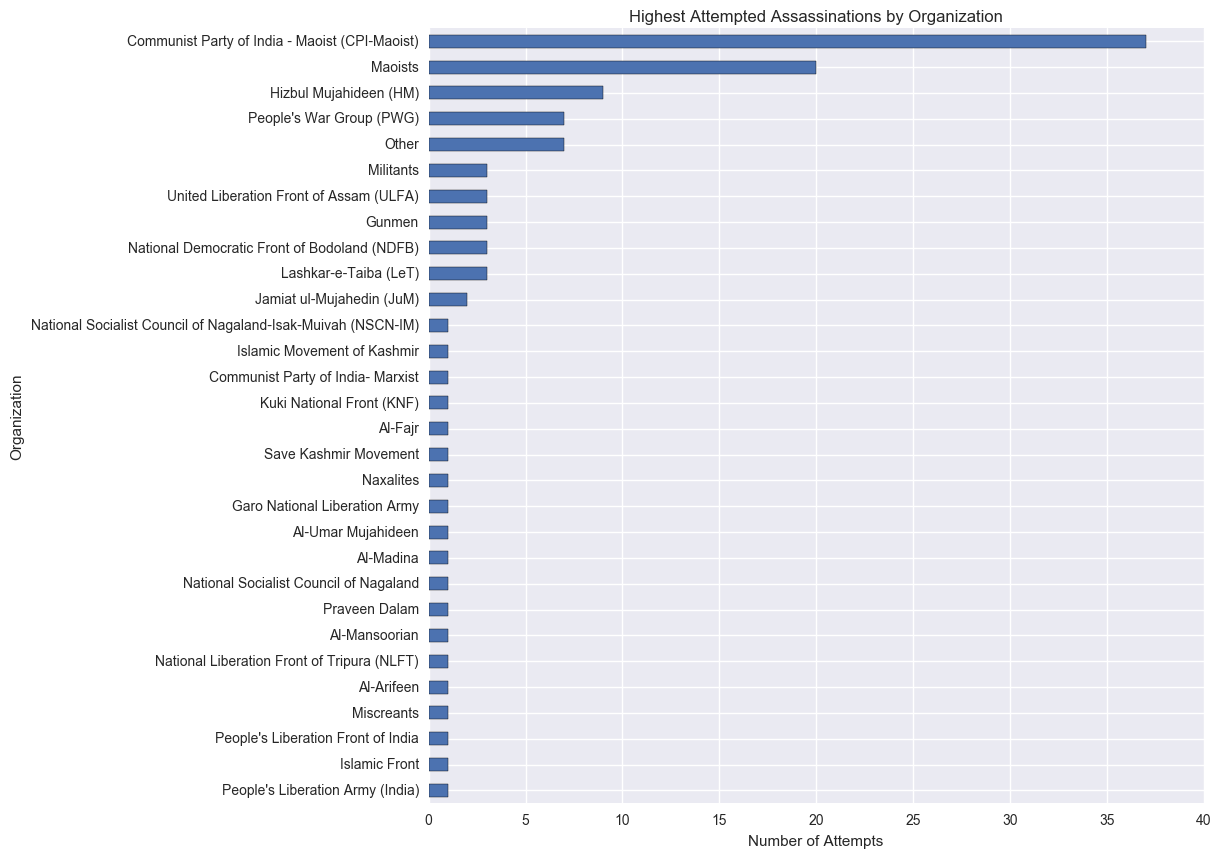

In [1055]:
#Highest perpetrators of assassination attempts
plt.figure(figsize= (10, 10))
assassination['Terrorist Organization'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Highest Attempted Assassinations by Organization')
plt.ylabel('Organization')
plt.xlabel('Number of Attempts')

In [1036]:
#creating a dataframe of organizations with 5 highest assassination attempts
assassin_org_5 = list(assassination['Terrorist Organization'].value_counts(ascending = False).index[0:5])
assassination_df = assassination[assassination['Terrorist Organization'].isin(assassin_org_5)]

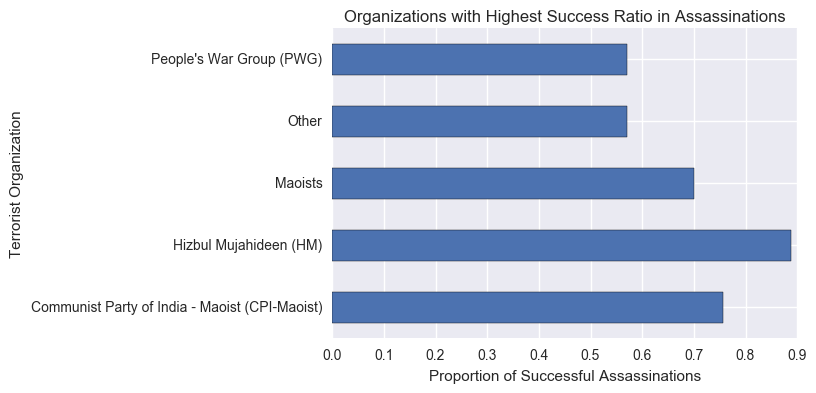

In [1053]:
##plotting to find the most successful organization in terms of assassinations
assassination_df.groupby('Terrorist Organization')['success'].mean().plot(kind = 'barh')
plt.title('Organizations with Highest Success Ratio in Assassinations')
plt.xlabel('Proportion of Successful Assassinations')

In terms of success rates, The Hizbul Mujahideen were the most successful in carrying out assassinations, but carried out half the total assassination attemps of the CPI. 

###Summary

The initial spike in attacks were seen around the time of the Kargil war. However, a real increase in attacks was seen one the CPI became more and more politically involved. 

Not only did the CPI attack India the most, they had the most number of attacks in all domains, be it bomb blasts, assault weapons, kidnapping, and even assassinations. Out of the total of 4972 attacks that have taken place since 1975, the CPI are responsible for 1547 of them, even thought they were formed in 2004. It is no wonder why they are a group banned in India.

Once the Indian army was deployed, the number of attacks came crashing down, however it seems to have stabilized around the 275 attacks per year mark, which is almost 1 attack every 1.5 days, which I would still say is higher than we'd want it to be.

The safest place to be judging by this dataset, is the west of India or South-west of India.

What surprised me initially about this dataset was that I was expecting most of the attacks to come from our border with Pakistan as they are considered our greatest threat by the Indian media. Therefore, to see an overwhelming number of attacks come from our eastern border instead took me by surprise.